In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pygsp
import time as timeModule
%matplotlib inline

In [2]:
nodes = pd.read_pickle('nodes.pkl')
edges = pd.read_pickle('terroristAttacksLocEdges.pkl')

In [3]:
nodes = nodes.sort_values(by=['timestamp'])

In [4]:
nUnknown = 100
edgesArray = edges.values[:,2:].tolist()
nodes = nodes.reset_index()
originalGraph = nx.Graph(edgesArray)
for n in nodes.values:
    nId = n[0]
    if not originalGraph.has_node(nId):
        originalGraph.add_node(nId)

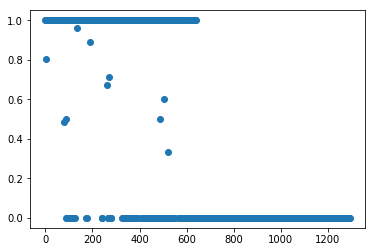

In [104]:
clustering=nx.clustering(originalGraph)
plt.plot(clustering.values(),'o')

In [5]:
originalCoords = nx.spring_layout(originalGraph,seed=0,k=.25)

## Weighting
General form:
$$w\left(n_1,n_2\right)=\alpha_1 l_{n_1,n_2}+\alpha_2 \left(1-\frac{|n_1-n_2|}{N_\text{features}}\right)$$

In [69]:
alpha = np.array([1,1])

In [105]:
def weight(n1,n2,alpha):
    """
    Returns the weight of the link between nodes `n1` and `n2`
    """
    #distance = np.sqrt((np.sum(((n1.values[3:-2]-n2.values[3:-2])*1.)**2)\
    #           +(n1['type'] != n2['type'])*1.)**2)
    #print(distance,np.sqrt(106))
    beg=3
    end=2
    diff1 = n1.values[beg:-end]-n2.values[beg:-end]
    diff2 = (n1['type'] != n2['type'])*1.
    dist  = np.sum(np.abs(diff1))+np.abs(diff2)
    #weight = 
#    print(weight)
    return alpha*(1-dist/(n1.shape[0]-beg-end-1))
    #return alpha*(np.exp(-distance/np.sqrt(n1.values.shape[0]))-np.exp(-1))

In [89]:
weights=list()
for i in range(nNodes):
    print('Node',i)
    for j in range(i+1,nNodes):
        weights.append(weight(nodes.iloc[i],nodes.iloc[j],1))
        assert weights[-1] >= 0

Node 0
Node 1


KeyboardInterrupt: 

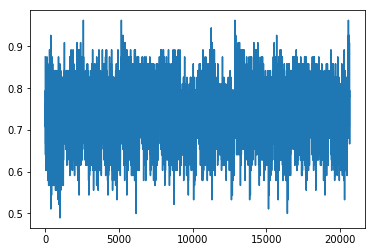

In [87]:
plt.plot(weights)

In [90]:
# Build the weighted graph
graph = nx.Graph(edgesArray)

for i in range(nodes.shape[0]):
    graph.add_node(nodes.iloc[i]['node_index'])

nNodes = graph.number_of_nodes()

for i in range(nNodes):
    node1 = nodes.iloc[i]
    print('Node',i)
    for j in range(i+1,nNodes):
        node2 = nodes.iloc[j]
        if graph.has_edge(node1['node_index'],
                          node2['node_index']) or \
        graph.has_edge(node2['node_index'],
                          node1['node_index']):
            graph[node1['node_index']][node2['node_index']]['weight'] = \
                weight(node1, node2, alpha[1])+alpha[0]
        else:
            graph.add_edge(node1['node_index'], node2['node_index'],
                          weight=weight(node1, node2, alpha[1]))

Node 0
Node 1
Node 2
Node 3
Node 4
Node 5
Node 6
Node 7
Node 8
Node 9
Node 10
Node 11
Node 12
Node 13
Node 14
Node 15
Node 16
Node 17
Node 18
Node 19
Node 20
Node 21
Node 22
Node 23
Node 24
Node 25
Node 26
Node 27
Node 28
Node 29
Node 30
Node 31
Node 32
Node 33
Node 34
Node 35
Node 36
Node 37
Node 38
Node 39
Node 40
Node 41
Node 42
Node 43
Node 44
Node 45
Node 46
Node 47
Node 48
Node 49
Node 50
Node 51
Node 52
Node 53
Node 54
Node 55
Node 56
Node 57
Node 58
Node 59
Node 60
Node 61
Node 62
Node 63
Node 64
Node 65
Node 66
Node 67
Node 68
Node 69
Node 70
Node 71
Node 72
Node 73
Node 74
Node 75
Node 76
Node 77
Node 78
Node 79
Node 80
Node 81
Node 82
Node 83
Node 84
Node 85
Node 86
Node 87
Node 88
Node 89
Node 90
Node 91
Node 92
Node 93
Node 94
Node 95
Node 96
Node 97
Node 98
Node 99
Node 100
Node 101
Node 102
Node 103
Node 104
Node 105
Node 106
Node 107
Node 108
Node 109
Node 110
Node 111
Node 112
Node 113
Node 114
Node 115
Node 116
Node 117
Node 118
Node 119
Node 120
Node 121
Node 122
Nod

Node 924
Node 925
Node 926
Node 927
Node 928
Node 929
Node 930
Node 931
Node 932
Node 933
Node 934
Node 935
Node 936
Node 937
Node 938
Node 939
Node 940
Node 941
Node 942
Node 943
Node 944
Node 945
Node 946
Node 947
Node 948
Node 949
Node 950
Node 951
Node 952
Node 953
Node 954
Node 955
Node 956
Node 957
Node 958
Node 959
Node 960
Node 961
Node 962
Node 963
Node 964
Node 965
Node 966
Node 967
Node 968
Node 969
Node 970
Node 971
Node 972
Node 973
Node 974
Node 975
Node 976
Node 977
Node 978
Node 979
Node 980
Node 981
Node 982
Node 983
Node 984
Node 985
Node 986
Node 987
Node 988
Node 989
Node 990
Node 991
Node 992
Node 993
Node 994
Node 995
Node 996
Node 997
Node 998
Node 999
Node 1000
Node 1001
Node 1002
Node 1003
Node 1004
Node 1005
Node 1006
Node 1007
Node 1008
Node 1009
Node 1010
Node 1011
Node 1012
Node 1013
Node 1014
Node 1015
Node 1016
Node 1017
Node 1018
Node 1019
Node 1020
Node 1021
Node 1022
Node 1023
Node 1024
Node 1025
Node 1026
Node 1027
Node 1028
Node 1029
Node 1030
Node 1

In [ ]:
#nx.write_gpickle(graph,'weightedGraphLv2-1-1.pkl')

In [10]:
# Remove nodes without timestamp information
print(graph.number_of_nodes())
for nodeId in nodes.iloc[-7:].values[:,0]:
    try:
        graph.remove_node(nodeId)
    except nx.NetworkXError:
        pass
print(graph.number_of_nodes())

1293
1286


In [ ]:
#print(nodes.shape)
# Remove isolated nodes
#for node in nodes.values.copy():
#    nodeId = node[0]
#    if not graph.has_node(nodeId):
#        nodes = nodes.drop(index=nodes[nodes['node_index']==nodeId].index)
#print(nodes.shape)

In [11]:
graph = nx.read_gpickle('weightedGraphLv2-1-1.pkl')
nNodes = graph.number_of_nodes()
peaks,eigenvalues=np.load('peaksAndEigRatio.npy')

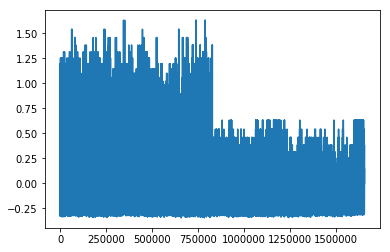

In [37]:
plt.plot(nx.adjacency_matrix(graph).toarray().ravel())

In [13]:
#peaks = list()
#eigenvalues = list()

In [33]:
if False:
    eigenvalues = list()
    peaks = list()
for time in range(489,580):#nNodes-10,nNodes):
    print('Iteration={}'.format(time))
    subgraph1 = graph.subgraph(nodes.iloc[0:time  ]['node_index'].values)
    subgraph2 = graph.subgraph(nodes.iloc[0:time+1]['node_index'].values)
    # Find vector of attachement to new node
    attach = np.zeros((subgraph1.number_of_nodes()))
    nodesList = nodes.iloc[0:time]['node_index'].values
    nextNodeId = nodes.iloc[time]['node_index']
    for i in range(nodesList.shape[0]):
        node = nodesList[i]
        if [nextNodeId,node] in edgesArray or \
        [node,nextNodeId] in edgesArray:
            attach[i] = 1.
    #if True:
    #    print('Plotting attach…')
    #    fig = plt.figure()
    #    plt.plot(nodesList,attach,'+')
    #    plt.plot(nodesList,[([nextNodeId,node] in edgesArray or \
    #    [node,nextNodeId] in edgesArray) for node in nodesList],'x')
    #    plt.savefig('pics/alphaL-{}-{}/attach-{}.pdf'.format(alpha[0],alpha[1],time))
    #    plt.close(fig)
   
    if nodesList.shape[0] > 1 and np.any(attach != 0):
        print('Found a useful iteration')
    #    #fig = plt.figure()
        adjacencyMatrix = nx.adjacency_matrix(subgraph1, nodelist=nodesList).toarray()
        spectralGraph = pygsp.graphs.Graph(adjacencyMatrix)
        try:
            spectralGraph.compute_fourier_basis()
        except AssertionError:
            pass
        attachHat = spectralGraph.gft(attach)
        indexMax = np.argmax(np.abs(attachHat))
        if True:
            print('Predicting…')
            # Prediction
            attachHatPredict = np.zeros(attach.shape)
            indexWhere = np.argwhere(spectralGraph.e >= adjacencyMatrix.shape[0]*meanEigenvalueRatio)[0][0]
            attachHatPredict[indexWhere] = meanPeaks
            attachPredict = spectralGraph.igft(attachHatPredict)
        if False:
            print('Estimating…')
            if not np.isclose(attachHat[indexMax],0):
                print('index max',indexMax)
                peaks.append(np.abs(attachHat[indexMax]))
                eigenvalues.append(spectralGraph.e[indexMax]/adjacencyMatrix.shape[0])
        if True:
            print('Plotting GFT…')
            fig = plt.figure()
            plt.plot(spectralGraph.e, np.abs(attachHat),'o')
            plt.plot(spectralGraph.e, np.abs(attachHatPredict),'o')
            plt.xlabel('Eigenvalue')
            plt.ylabel('Magnitude of GFT')
            plt.title('GFT of prediction signal')
            plt.savefig('pics/alphaL-{}-{}/spectrum-{}.png'.format(alpha[0],alpha[1],time))
            plt.close(fig)
        

Iteration=489
Plotting attach…
Iteration=490
Plotting attach…
Found a useful iteration
Predicting…
Plotting GFT…
Iteration=491
Plotting attach…
Iteration=492
Plotting attach…
Iteration=493
Plotting attach…
Iteration=494
Plotting attach…
Found a useful iteration
Predicting…
Plotting GFT…
Iteration=495
Plotting attach…
Found a useful iteration
Predicting…
Plotting GFT…
Iteration=496


KeyboardInterrupt: 

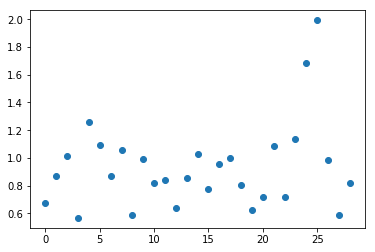

In [17]:
plt.plot(peaks,'o')
meanPeaks = np.median(peaks)

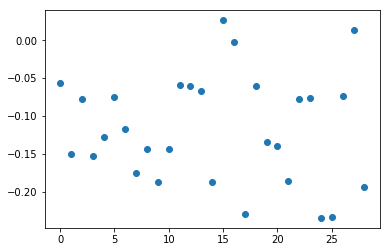

In [18]:
plt.plot(eigenvalues,'o')
meanEigenvalueRatio = np.mean(eigenvalues)

In [ ]:
np.save('peaksAndEigRatio.npy',[peaks,eigenvalues])

In [ ]:
peaks